In [1]:
import openamundsen as oa
import xarray as xr

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


# Run Model

In [2]:
import pandas as pd
import altair as alt
df = pd.read_csv("../data/openamundsen/1.csv")
df.date = pd.to_datetime(df['date'])
df = df.set_index('date')

In [3]:
df_alternate = df.copy(deep=True)
df_alternate.loc['20230528': '20230529', 'temp'] = 273.15 + 10
df_alternate.loc['20230528': '20230529', 'precip'] = 10

In [4]:
may_data = df[df.index.month == 5].reset_index()
# Create the Altair chart
chart = alt.Chart(may_data).mark_line().encode(
    x='date:T',
    y='precip:Q',
    color=alt.value('blue')
).properties(
    title='Precipitation and Wind Speed in May'
)

# Add wind speed line to the chart
wind_speed_line = alt.Chart(may_data).mark_line().encode(
    x='date:T',
    y='wind_speed:Q',
    color=alt.value('red')
)

temp_line = alt.Chart(may_data.assign(temp = may_data.temp - 273.15)).mark_line().encode(
    x='date:T',
    y='temp:Q',
    color=alt.value('red')
)

# Combine the two lines
def props(chart):
    return chart.properties(width=300, height=100)
normal = props(chart) & props(wind_speed_line) & props(temp_line)

In [5]:
may_data = df_alternate[df_alternate.index.month == 5].reset_index()
# Create the Altair chart
chart = alt.Chart(may_data).mark_line().encode(
    x='date:T',
    y='precip:Q',
    color=alt.value('blue')
).properties(
    title='Precipitation and Wind Speed in May'
)

# Add wind speed line to the chart
wind_speed_line = alt.Chart(may_data).mark_line().encode(
    x='date:T',
    y='wind_speed:Q',
    color=alt.value('red')
)

temp_line = alt.Chart(may_data.assign(temp = may_data.temp - 273.15)).mark_line().encode(
    x='date:T',
    y='temp:Q',
    color=alt.value('red')
)

# Combine the two lines
def props(chart):
    return chart.properties(width=300, height=100)
alternate = props(chart) & props(wind_speed_line) & props(temp_line)

In [6]:
normal | alternate

alt.HConcatChart(...)

In [7]:
df_alternate.to_csv("../data/openamundsen/1.csv")

In [8]:
config = oa.read_config('open_amundsen_config.yml')  # read in configuration file
model = oa.OpenAmundsen(config)  # create OpenAmundsen object and populate unspecified parameters with default values

In [9]:
model.initialize()  # read in input data files, initialize state variables etc.

2025-02-16 17:32:45 | INFO     | Initializing model grid
2025-02-16 17:32:45 | INFO     | Grid has dimensions 337x280
2025-02-16 17:32:45 | INFO     | Reading DEM (../data/openamundsen/dem_uppereastriver_50.asc)
2025-02-16 17:32:45 | INFO     | Reading sky view factor (../data/openamundsen/svf_uppereastriver_50.asc)
2025-02-16 17:32:45 | INFO     | Reading ROI (../data/openamundsen/roi_uppereastriver_50.asc)
2025-02-16 17:32:45 | INFO     | Reading meteo file: ../data/openamundsen/1.csv
2025-02-16 17:32:45 | INFO     | Correcting station precipitation with method: wmo
2025-02-16 17:32:45 | INFO     | Calculating terrain parameters


In [10]:
model.run()  # run the model

2025-02-16 17:32:45 | INFO     | Starting model run
2025-02-16 17:32:45 | INFO     | Processing time step 2022-11-16 00:00
2025-02-16 17:32:46 | INFO     | Processing time step 2022-11-16 03:00
2025-02-16 17:32:46 | INFO     | Processing time step 2022-11-16 06:00
2025-02-16 17:32:46 | INFO     | Processing time step 2022-11-16 09:00
2025-02-16 17:32:46 | INFO     | Processing time step 2022-11-16 12:00
2025-02-16 17:32:46 | INFO     | Processing time step 2022-11-16 15:00
2025-02-16 17:32:46 | INFO     | Processing time step 2022-11-16 18:00
2025-02-16 17:32:46 | INFO     | Processing time step 2022-11-16 21:00
2025-02-16 17:32:46 | INFO     | Processing time step 2022-11-17 00:00
2025-02-16 17:32:46 | INFO     | Processing time step 2022-11-17 03:00
2025-02-16 17:32:46 | INFO     | Processing time step 2022-11-17 06:00
2025-02-16 17:32:46 | INFO     | Processing time step 2022-11-17 09:00
2025-02-16 17:32:46 | INFO     | Processing time step 2022-11-17 12:00
2025-02-16 17:32:46 | INF

In [11]:
ls openamundsen_results/

output_grids.nc       output_timeseries.nc


# Examine results

**something is wrong with the input precip inputs - they are getting doubled somehow**

In [50]:
results_alt = xr.open_dataset("openamundsen_results/output_timeseries.nc")
results = xr.open_dataset("openamundsen_results_archive/output_timeseries.nc")

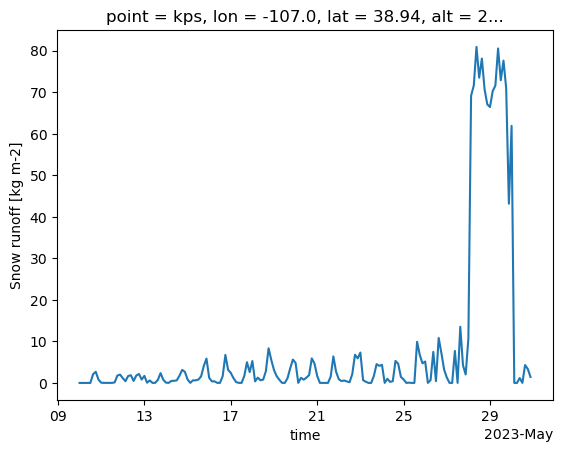

In [51]:
results_alt.runoff.sel(point='kps', time=slice('20230510', '20230530')).plot()

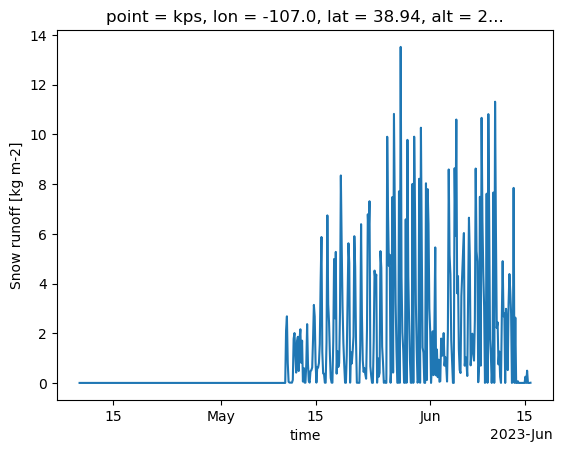

In [52]:
results.runoff.sel(point='kps', time=slice('20230410', '20230630')).plot()

In [56]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '')

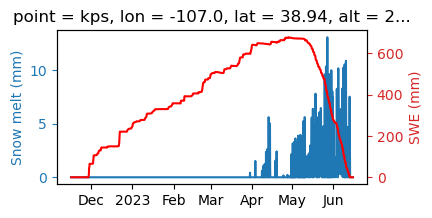

In [97]:
fig, left_ax = plt.subplots(figsize=(4,2))
right_ax = left_ax.twinx()
results.swe.sel(point='kps').plot(label='SWE, modeled', color='red', ax=right_ax)
results['melt'].sel(point='kps').plot(ax=left_ax)
right_ax.set_ylabel('SWE (mm)', color='tab:red')
left_ax.set_ylabel('Snow melt (mm)', color='tab:blue')
right_ax.set_xlabel('')
left_ax.set_xlabel('')
right_ax.tick_params(axis='y', colors='tab:red')  # Set the color of the left axis ticks and labels
left_ax.tick_params(axis='y', colors='tab:blue')  # Set the color of the left axis ticks and labels
plt.title('')

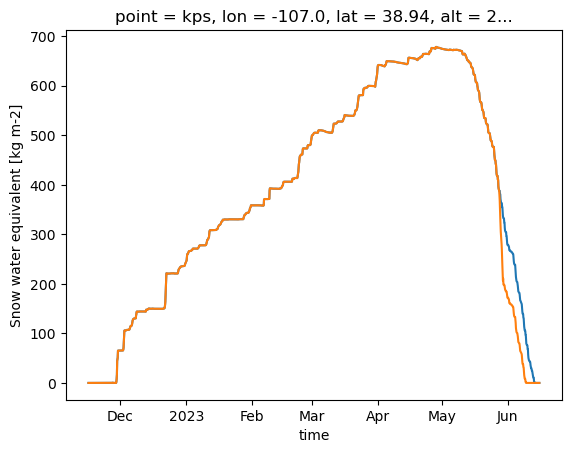

In [15]:
results.swe.sel(point='kps').plot()
results_alt.swe.sel(point='kps').plot()

<Axes: xlabel='time'>

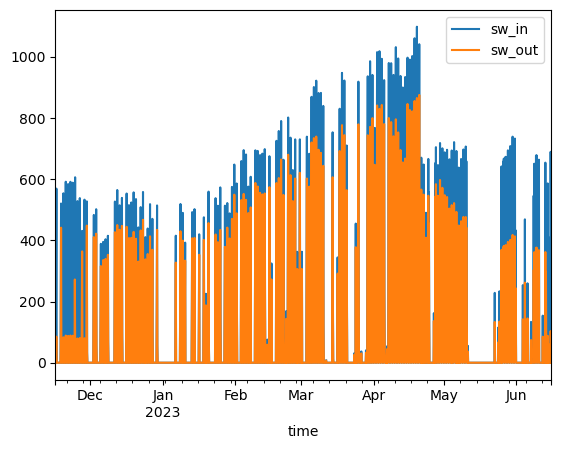

In [16]:
results[['sw_in', 'sw_out']].sel(point='kps').to_dataframe()[['sw_in', 'sw_out']].plot()

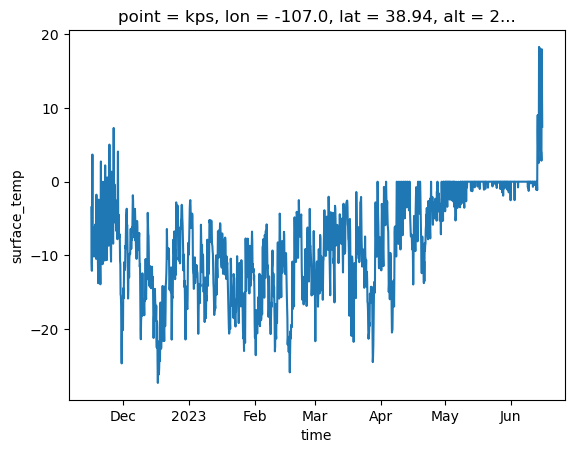

In [17]:
(results.surface_temp - 273.15).sel(point='kps').plot()

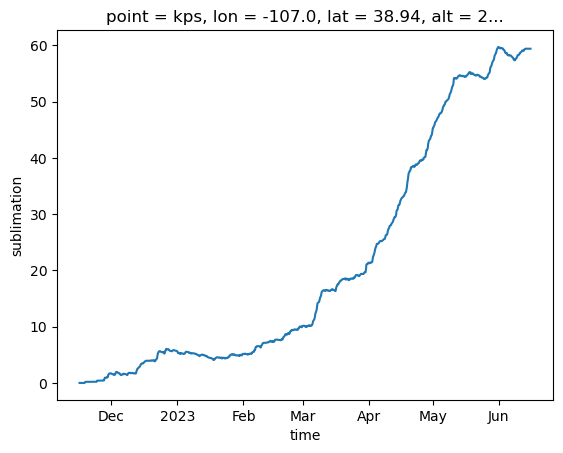

In [18]:
results['sublimation'].sel(point='kps').cumsum().plot()

In [19]:
results = xr.open_dataset("openamundsen_results/output_grids.nc")

In [46]:
import geopandas as gpd
from shapely.geometry import Point

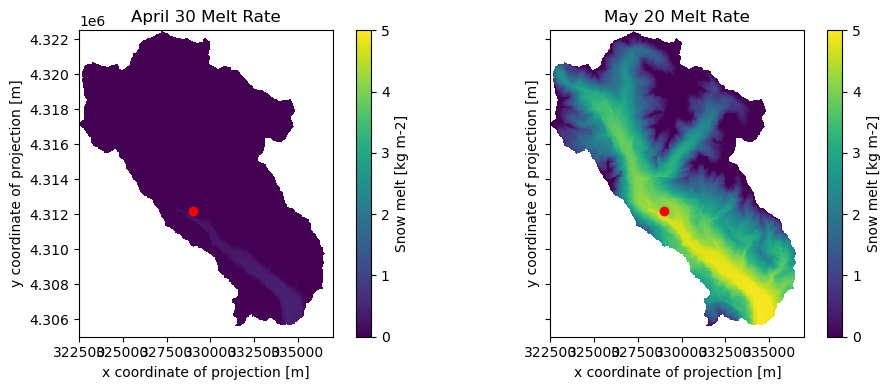

In [48]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

# Plot for April
results['melt'].sel(time='2023-04-30T21:00:00.000000000').plot(ax=axes[0], cmap='viridis', vmin=0, vmax=5)
axes[0].set_title('April 30 Melt Rate')

# # Plot for May
results['melt'].sel(time='2023-05-20T21:00:00.000000000').plot(ax=axes[1], cmap='viridis', vmin=0, vmax=5)
axes[1].set_title('May 20 Melt Rate')

kps_loc = gpd.GeoSeries([Point(-106.972983, 38.941817, 0)],
    index = ['Kettle Ponds'],
    crs = 'epsg:4326'
).to_crs(results.rio.crs)
kps_loc.plot(ax=axes[0], color='red')
kps_loc.plot(ax=axes[1], color='red')

for ax in axes.flatten():
    ax.set_xlim(322500, 337000)
    ax.set_ylim(4305000, 4322500)
    ax.set_aspect('equal')
    
plt.tight_layout()
plt.show()